In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Replace with your CSV path
df = pd.read_csv('/home/arctan/data/justice_data/sample2.csv', parse_dates=['date_of_filing', 'date_of_decision'])

# Verify first few rows
print(df.head())

                ddl_case_id date_of_filing date_of_decision  filing_year  \
0  02-05-33-202100000502015     2015-06-06       2015-09-11         2015   
1  03-23-15-201200004322010     2010-08-17       2011-04-08         2010   
2  03-04-03-201200029152014     2014-07-11       2015-06-17         2014   
3  03-06-06-201200001612017     2017-04-24       2017-04-24         2017   
4  04-03-05-202900010002013     2013-08-23       2015-03-31         2013   

   state_code  court_no female_defendant female_petitioner female_judge  \
0           2        33           0 male            0 male     1 female   
1           3        15           0 male          1 female  0 nonfemale   
2           3         3           0 male            0 male  0 nonfemale   
3           3         6           0 male            0 male  0 nonfemale   
4           4         5           0 male            0 male  0 nonfemale   

                   act_s  section_s  bailable_ipc  number_sections_ipc  \
0  The Indian Pena

In [5]:
print(df.info())
df.to_csv("s.csv")
# Summary stats for numeric columns
print(df.describe())

# Check unique values for categorical columns
print("Dispositions:", df['disposition'].unique())
print("Bailable IPC:", df['bailable_ipc'].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14926 entries, 0 to 14925
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ddl_case_id          14926 non-null  object        
 1   date_of_filing       14926 non-null  datetime64[ns]
 2   date_of_decision     14926 non-null  datetime64[ns]
 3   filing_year          14926 non-null  int64         
 4   state_code           14926 non-null  int64         
 5   court_no             14926 non-null  int64         
 6   female_defendant     14926 non-null  object        
 7   female_petitioner    14926 non-null  object        
 8   female_judge         14926 non-null  object        
 9   act_s                14926 non-null  object        
 10  section_s            14926 non-null  int64         
 11  bailable_ipc         14926 non-null  object        
 12  number_sections_ipc  14926 non-null  int64         
 13  disposition          14926 non-

In [6]:
# Ensure binary columns are 0/1
# df['female_defendant'] = df['female_defendant'].astype(int)
# df['female_judge'] = df['female_judge'].astype(int)
print(df["female_defendant"].unique())
print(df["female_petitioner"].unique())
print(df["female_judge"].unique())
# Check for missing values
print("Missing values:\n", df.isnull().sum())


['0 male' '1 female']
['0 male' '1 female']
['1 female' '0 nonfemale']
Missing values:
 ddl_case_id            0
date_of_filing         0
date_of_decision       0
filing_year            0
state_code             0
court_no               0
female_defendant       0
female_petitioner      0
female_judge           0
act_s                  0
section_s              0
bailable_ipc           0
number_sections_ipc    0
disposition            0
dtype: int64


In [7]:
valid_genders = ['0 male', '1 female']
mapping = {"0 male": 0, "1 female": 1}

df_clean = df[
    df["female_defendant"].isin(valid_genders) &
    df["female_petitioner"].isin(valid_genders)
].copy() 
df_clean.info()
df_clean.loc[:, "female_defendant"] = df_clean["female_defendant"].map(mapping)
df_clean.loc[:, "female_petitioner"] = df_clean["female_petitioner"].map(mapping)


valid_genders = ['0 nonfemale', '1 female']
mapping = {"0 nonfemale": 0, "1 female": 1}

df_clean = df_clean[df_clean["female_judge"].isin(valid_genders)]
df_clean.loc[:, "female_judge"] = df_clean["female_judge"].map(mapping)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14926 entries, 0 to 14925
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ddl_case_id          14926 non-null  object        
 1   date_of_filing       14926 non-null  datetime64[ns]
 2   date_of_decision     14926 non-null  datetime64[ns]
 3   filing_year          14926 non-null  int64         
 4   state_code           14926 non-null  int64         
 5   court_no             14926 non-null  int64         
 6   female_defendant     14926 non-null  object        
 7   female_petitioner    14926 non-null  object        
 8   female_judge         14926 non-null  object        
 9   act_s                14926 non-null  object        
 10  section_s            14926 non-null  int64         
 11  bailable_ipc         14926 non-null  object        
 12  number_sections_ipc  14926 non-null  int64         
 13  disposition          14926 non-

In [12]:
df_clean["female_petitioner"].unique()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14926 entries, 0 to 14925
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ddl_case_id          14926 non-null  object        
 1   date_of_filing       14926 non-null  datetime64[ns]
 2   date_of_decision     14926 non-null  datetime64[ns]
 3   filing_year          14926 non-null  int64         
 4   state_code           14926 non-null  int64         
 5   court_no             14926 non-null  int64         
 6   female_defendant     14926 non-null  object        
 7   female_petitioner    14926 non-null  object        
 8   female_judge         14926 non-null  object        
 9   act_s                14926 non-null  object        
 10  section_s            14926 non-null  int64         
 11  bailable_ipc         14926 non-null  object        
 12  number_sections_ipc  14926 non-null  int64         
 13  disposition          14926 non-

In [9]:
# Create same-gender indicator (1 = judge/defendant same gender)
df_clean['same_gender'] = (df_clean['female_judge'] == df_clean['female_defendant']).astype(int)

# Calculate case duration (days)
df_clean['duration_days'] = (df_clean['date_of_decision'] - df_clean['date_of_filing']).dt.days

# Simplify disposition to binary (1 = acquitted)
df_clean['acquitted'] = df_clean['disposition'].apply(lambda x: 1 if x == 'acquitted' else 0)

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14926 entries, 0 to 14925
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ddl_case_id          14926 non-null  object        
 1   date_of_filing       14926 non-null  datetime64[ns]
 2   date_of_decision     14926 non-null  datetime64[ns]
 3   filing_year          14926 non-null  int64         
 4   state_code           14926 non-null  int64         
 5   court_no             14926 non-null  int64         
 6   female_defendant     14926 non-null  object        
 7   female_petitioner    14926 non-null  object        
 8   female_judge         14926 non-null  object        
 9   act_s                14926 non-null  object        
 10  section_s            14926 non-null  int64         
 11  bailable_ipc         14926 non-null  object        
 12  number_sections_ipc  14926 non-null  int64         
 13  disposition          14926 non-

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df_clean['duration'], kde=True)
plt.title('Distribution of Case Durations')
plt.show()


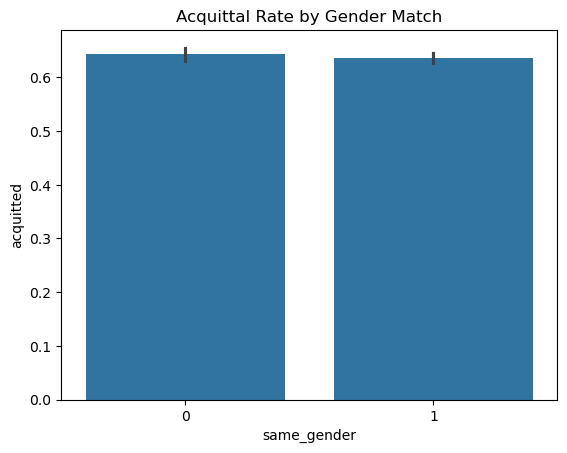

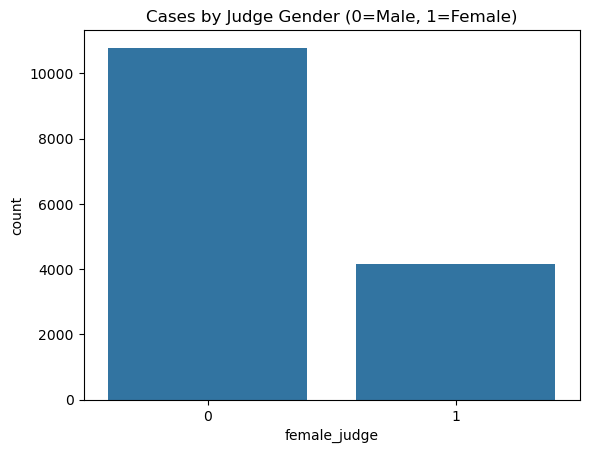

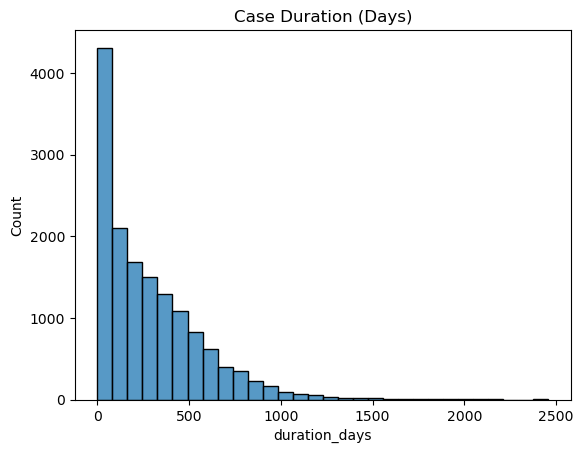

In [10]:
# Acquittal rate by gender match
sns.barplot(x='same_gender', y='acquitted', data=df_clean)
plt.title("Acquittal Rate by Gender Match")
plt.show()

# Distribution of cases by judge gender
sns.countplot(x='female_judge', data=df_clean)
plt.title("Cases by Judge Gender (0=Male, 1=Female)")
plt.show()

# Case duration distribution
sns.histplot(df_clean['duration_days'], bins=30)
plt.title("Case Duration (Days)")
plt.show()

In [11]:
import statsmodels.api as sm

# Forward selection
def forward_selection(data, target, max_features=10):
    initial_features = []
    best_features = []
    while len(best_features) < max_features:
        remaining_features = list(set(data.columns) - set(best_features))
        best_pval = 1
        best_feature = None
        for feature in remaining_features:
            formula = f"{target} ~ {' + '.join(best_features + [feature])}"
            model = sm.Logit.from_formula(formula, data).fit(disp=0)
            pval = model.pvalues[feature]
            if pval < best_pval:
                best_pval = pval
                best_feature = feature
        if best_pval < 0.05:
            best_features.append(best_feature)
        else:
            break
    return best_features
print(df_clean.columns.tolist())
forward_selection(df_clean, 'acquitted')

['ddl_case_id', 'date_of_filing', 'date_of_decision', 'filing_year', 'state_code', 'court_no', 'female_defendant', 'female_petitioner', 'female_judge', 'act_s', 'section_s', 'bailable_ipc', 'number_sections_ipc', 'disposition', 'same_gender', 'duration_days', 'acquitted']


KeyError: 'female_petitioner'

In [62]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2

# Drop problematic date columns
X = df_clean.drop(columns=['date_of_filing', 'date_of_decision'])

# Label encode categorical columns
label_cols = ['bailable_ipc', 'disposition', 'act_s', 'section_s']
le = LabelEncoder()
for col in label_cols:
    X[col] = le.fit_transform(X[col].astype(str))

# Make sure all columns are numeric and non-negative
X = X.select_dtypes(include=['int64', 'float64'])

# Target variable
y = df_clean['acquitted']

# Run SelectKBest
selector = SelectKBest(score_func=chi2, k=5)
selector.fit(X, y)
selected_features = X.columns[selector.get_support()]
print("Selected features:", selected_features.tolist())


Selected features: ['state_code', 'section_s', 'disposition', 'duration_days', 'acquitted']


In [43]:
# Select relevant columns
analysis_df = df_clean[[
    'acquitted',
    'same_gender',
    'female_judge',
    'female_defendant',
    'duration_days',
    'bailable_ipc',
    'number_sections_ipc',
    'state_code',
    'filing_year'
]]

# Drop rows with missing values
analysis_df = analysis_df.dropna()

In [36]:
# Create a cross-tabulation of judge gender vs. defendant gender
contingency_table = pd.crosstab(
    df_clean['female_judge'],  # Rows (0 = male judge, 1 = female judge)
    df_clean['female_defendant']  # Columns (0 = male defendant, 1 = female defendant)
)

print("Contingency Table:\n", contingency_table)

Contingency Table:
 female_defendant     0     1
female_judge                
0                 8676  2110
1                 3319   821


In [37]:
from scipy.stats import chi2_contingency

chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Square Statistic: {chi2:.2f}")
print(f"P-value: {p_value:.4f}")

Chi-Square Statistic: 0.12
P-value: 0.7288


In [50]:
# Check acquittal rates and counts per state
state_stats = analysis_df.groupby('state_code')['acquitted'].agg(['mean', 'count'])
print("State Statistics:\n", state_stats)

# Check for states with 0% or 100% acquittal rates
problem_states = state_stats[(state_stats['mean'].isin([0, 1])) | (state_stats['count'] < 10)].index.tolist()
print("Problematic States:", problem_states)

State Statistics:
                 mean  count
state_code                 
2           0.855986   1111
3           0.393986   4523
4           0.880829   1544
7           1.000000     10
8           1.000000     34
10          0.655373   1889
11          1.000000      2
13          0.927039    233
15          0.941176     51
17          0.992974    427
18          0.714286     77
29          0.680796   5025
Problematic States: [7, 8, 11]


In [51]:
# Drop rows from problematic states
analysis_df_clean = analysis_df[~analysis_df['state_code'].isin(problem_states)].copy()

# Group rare states into "Other" (optional)
analysis_df_clean['state_code'] = np.where(
    analysis_df_clean['state_code'].isin([3, 4, 10, 13, 17, 18, 29]),  # Keep common states
    analysis_df_clean['state_code'],
    999  # "Other" category
)

In [14]:
df_clean["acquitted"].unique()

array([1, 0])

In [52]:
import statsmodels.formula.api as smf

# Logistic regression for acquittal probability
# Rerun the model with cleaned data
model = smf.logit(
    'acquitted ~ same_gender + C(filing_year) + C(state_code) + number_sections_ipc',
    data=analysis_df_clean
).fit(maxiter=100)

print(model.summary())


Optimization terminated successfully.
         Current function value: 0.497006
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:              acquitted   No. Observations:                14880
Model:                          Logit   Df Residuals:                    14862
Method:                           MLE   Df Model:                           17
Date:                Sun, 13 Apr 2025   Pseudo R-squ.:                  0.2406
Time:                        04:35:53   Log-Likelihood:                -7395.4
converged:                       True   LL-Null:                       -9739.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -0.3251      0.153     -2.127      0.033      -0.625      

In [66]:
model = smf.logit(
    'acquitted ~ female_judge + female_defendant + C(filing_year) + C(state_code) + number_sections_ipc',
    data=analysis_df_clean
).fit(maxiter=100)
model.summary()

Optimization terminated successfully.
         Current function value: 0.496805
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              acquitted   No. Observations:                14880
Model:                          Logit   Df Residuals:                    14861
Method:                           MLE   Df Model:                           18
Date:                Sun, 13 Apr 2025   Pseudo R-squ.:                  0.2409
Time:                        05:15:46   Log-Likelihood:                -7392.5
converged:                       True   LL-Null:                       -9739.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -0.4832      0.152     -3.178      0.001      -0.781      -0.185
female_judge[T.1]          0.1151      0.045      2.544      0.011       0.026       0.204
female_defendant[T.1]      0.1891      0.052      3.610      0.000       0.086       0.292
C(filing_year)[T.2011]    -0.4579      0.172     -2.668      0.008      -0.794      -0.122
C(filing_year)[T.2012]    -0.5791      0.163     -3.556      0.000      -0.898      -0.260
C(filing_year)[T.2013]    -0.5945      0.157     -3.786      0.000      -0.902      -0.287
C(filing_year)[T.2014]    -1.2223      0.150     -8.156      0.000      -1.516      -0.929
C(filing_year)[T.2015]    -1.5842      0.150    -10.541      0.000      -1.879      -1.290
C(filing_year)[T.2016]    -2.0349      0.150    -13.596      0.000      -2.328      -1.742
C(filing_year)[T.2017]    -2.1208      0.154    -13.783      0.000      -2.422      -1.819
C(filing_year)[T.2018]    -2.7628      0.165    -16.763      0.000      -3.086      -2.440
C(state_code)[T.4]         2.4285      0.092     26.361      0.000       2.248       2.609
C(state_code)[T.10]        1.6700      0.066     25.436      0.000       1.541       1.799
C(state_code)[T.13]        3.5943      0.268     13.391      0.000       3.068       4.120
C(state_code)[T.17]        5.6013      0.583      9.616      0.000       4.460       6.743
C(state_code)[T.18]        1.6101      0.281      5.724      0.000       1.059       2.161
C(state_code)[T.29]        1.6448      0.053     30.770      0.000       1.540       1.750
C(state_code)[T.999]       2.8087      0.099     28.429      0.000       2.615       3.002
number_sections_ipc        0.5335      0.017     30.493      0.000       0.499       0.568
==========================================================================================
"""

In [67]:
model = smf.logit(
    'acquitted ~ female_judge * female_defendant + female_judge * C(crime_type) + female_defendant * number_sections_ipc',
    data=analysis_df_clean
).fit()
model.summary()

PatsyError: Error evaluating factor: NameError: name 'crime_type' is not defined
    acquitted ~ female_judge * female_defendant + female_judge * C(crime_type) + female_defendant * number_sections_ipc
                                                                 ^^^^^^^^^^^^^